<a href="https://colab.research.google.com/github/creepereye1204/HomeWork/blob/main/HomeWork/Restnet101(rl%3D0.01%2Cresult%3D0.38%2Cepoch%3D30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf

In [ ]:


from google.colab import files
files.upload()

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

100% 779M/779M [00:28<00:00, 42.4MB/s]
100% 779M/779M [00:28<00:00, 28.9MB/s]


In [13]:
import os
os.mkdir('/content/train')


FileExistsError: ignored

In [14]:
!unzip /content/plant-pathology-2020-fgvc7.zip -d /content/

Archive:  /content/plant-pathology-2020-fgvc7.zip
  inflating: /content/images/Test_0.jpg  
  inflating: /content/images/Test_1.jpg  
  inflating: /content/images/Test_10.jpg  
  inflating: /content/images/Test_100.jpg  
  inflating: /content/images/Test_1000.jpg  
  inflating: /content/images/Test_1001.jpg  
  inflating: /content/images/Test_1002.jpg  
  inflating: /content/images/Test_1003.jpg  
  inflating: /content/images/Test_1004.jpg  
  inflating: /content/images/Test_1005.jpg  
  inflating: /content/images/Test_1006.jpg  
  inflating: /content/images/Test_1007.jpg  
  inflating: /content/images/Test_1008.jpg  
  inflating: /content/images/Test_1009.jpg  
  inflating: /content/images/Test_101.jpg  
  inflating: /content/images/Test_1010.jpg  
  inflating: /content/images/Test_1011.jpg  
  inflating: /content/images/Test_1012.jpg  
  inflating: /content/images/Test_1013.jpg  
  inflating: /content/images/Test_1014.jpg  
  inflating: /content/images/Test_1015.jpg  
  inflating: /c

In [15]:
import pandas as pd

In [16]:
train=pd.read_csv('/content/train.csv')

In [17]:
category=['healthy','multiple_diseases','rust','scab']

In [18]:
for dir in category:
  os.makedirs('/content/train/'+dir)

In [19]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [20]:
import numpy as np

In [21]:
TRAIN=pd.DataFrame(columns=['image','labels'])
for s in train.values:
  idx,label=s[0],s[1:]
  n=np.argmax(label)
  n=category[n]
  cols= ['image','labels']	
  
  add_row = [[idx,n]]	

  row_df = pd.DataFrame(data = add_row, columns = cols)	
                          
  TRAIN= pd.concat([TRAIN, row_df], ignore_index = True)
    

In [22]:
TRAIN

,image,labels
0,Train_0,scab
1,Train_1,multiple_diseases
2,Train_2,healthy
3,Train_3,rust
4,Train_4,healthy
...,...,...
1816,Train_1816,scab
1817,Train_1817,healthy
1818,Train_1818,healthy
1819,Train_1819,rust


In [23]:
import shutil
def move(data,where):
  path='/content/images/'
  for name,label in data.values:
      shutil.move(path+name+".jpg","/content/"+where+"/"+label+'/'+name+'.jpg')

In [24]:
move(TRAIN,"train")

In [25]:
TRAIN['labels'].value_counts()

rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: labels, dtype: int64

In [26]:
import matplotlib.pyplot as plt


<Axes: >

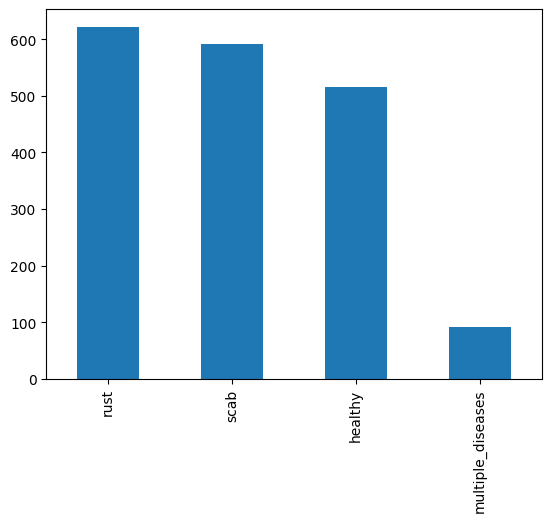

In [27]:
TRAIN['labels'].value_counts().plot(kind='bar')

In [28]:
len(train)

1821

In [54]:
batch=32
num_epochs = 20
img_height=256
img_width=256
dir="/content/train"

In [55]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

Found 1821 files belonging to 4 classes.
Using 1639 files for training.


In [56]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

Found 1821 files belonging to 4 classes.
Using 182 files for validation.


In [57]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'multiple_diseases', 'rust', 'scab']


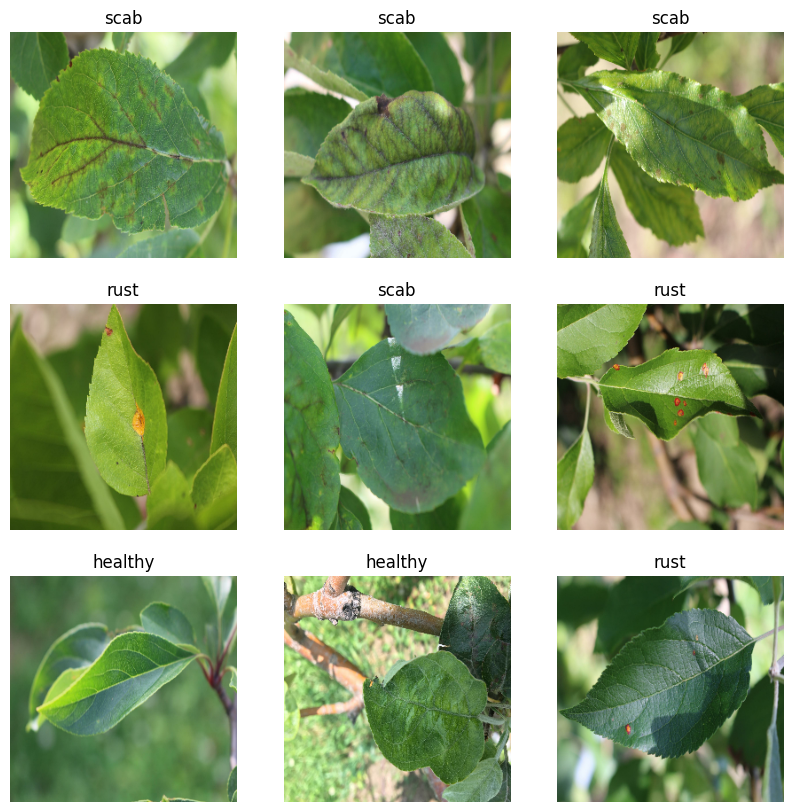

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [59]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
from tensorflow.keras.applications import DenseNet121,ResNet50,ResNet101

In [61]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [62]:
import tensorflow.keras.layers as layers

In [63]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# base_model = keras.applications.ResNet101(
#     weights='imagenet',
#     input_shape=(img_height, img_width, 3),
#     include_top=False)

# # Set the base_model's layers as non-trainable


# # Add the custom layers for 4-class classification
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# outputs = layers.Dense(4, activation='softmax')(x)

# # Create the final model
# model = keras.Model(inputs=base_model.input, outputs=outputs)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['categorical_accuracy'])


In [66]:
import tensorflow as tf
with tf.device("/device:GPU:0"):
  from tensorflow.keras.datasets import cifar10
  from tensorflow.keras.layers import Dense,Flatten
  from tensorflow.keras.models import Model
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
  from tensorflow.keras.callbacks import EarlyStopping



  base_model =ResNet101(weights='imagenet', include_top=False,input_shape=(img_height,img_width,3))

  x=base_model.output
  x=Flatten()(x)
  predictions=Dense(4,activation='softmax')(x)

  model=Model(inputs=base_model.input,outputs=predictions)


      
  model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  early_stopping =EarlyStopping(monitor='val_loss',patience=3,verbose=1)

  history=model.fit(train_ds,batch_size=64, epochs=30, validation_data=test_ds)

  score=model.evaluate(test_ds,verbose=0)
  print("Test loss:",score[0])
  print("Test accuracy:",score[1])

Epoch 1/30
52/52 [==============================] - 68s 684ms/step - loss: 26.5165 - accuracy: 0.3484 - val_loss: 3942004356717097045196800.0000 - val_accuracy: 0.3132
Epoch 2/30
52/52 [==============================] - 38s 692ms/step - loss: 6.9780 - accuracy: 0.3459 - val_loss: 756524800.0000 - val_accuracy: 0.3132
Epoch 3/30
52/52 [==============================] - 36s 647ms/step - loss: 2.3371 - accuracy: 0.3435 - val_loss: 149549.8438 - val_accuracy: 0.3132
Epoch 4/30
52/52 [==============================] - 37s 654ms/step - loss: 1.3895 - accuracy: 0.3588 - val_loss: 35.2799 - val_accuracy: 0.3352
Epoch 5/30
52/52 [==============================] - 37s 657ms/step - loss: 1.2865 - accuracy: 0.3569 - val_loss: 1.2492 - val_accuracy: 0.2857
Epoch 6/30
52/52 [==============================] - 37s 665ms/step - loss: 1.2759 - accuracy: 0.3594 - val_loss: 1.2461 - val_accuracy: 0.2857
Epoch 7/30
52/52 [==============================] - 39s 706ms/step - loss: 1.2764 - accuracy: 0.3557 - 